# Parte 1

O Certificado pode ser visto em: https://github.com/AlansAlonso/PG-IA/tree/main/Classificacao

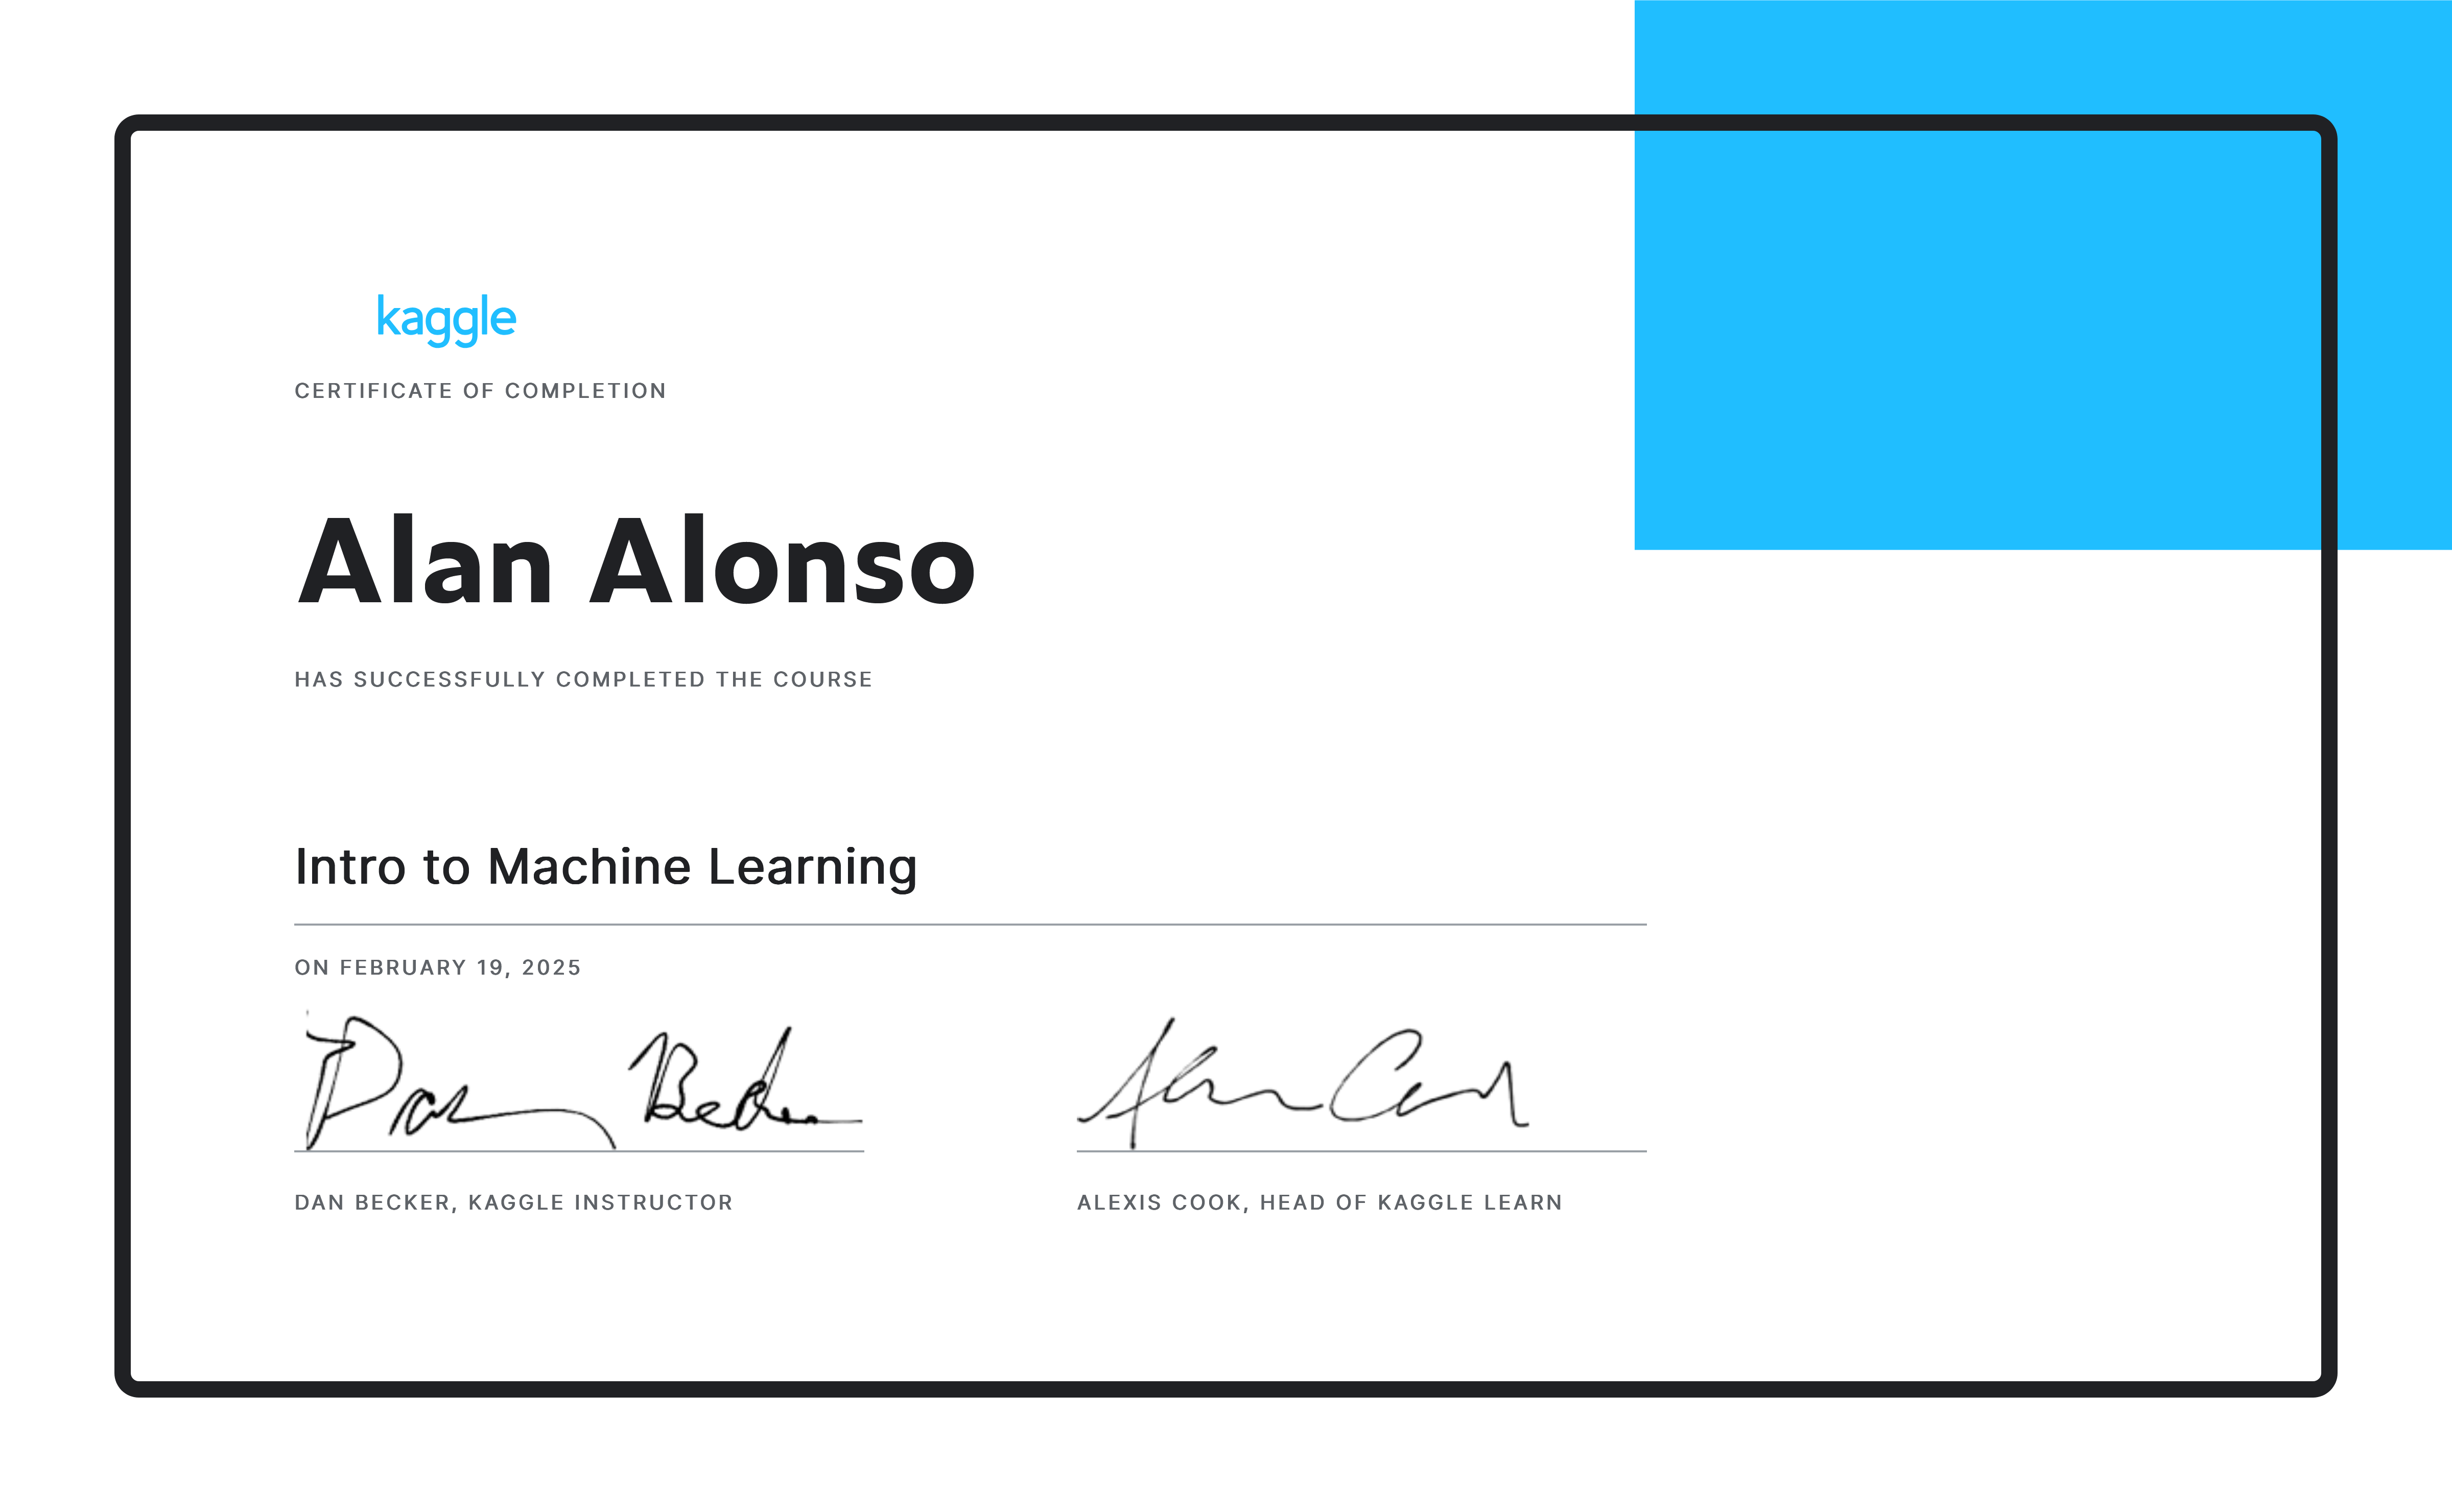

# Parte 2

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [68]:
# Carregando o dataset indicado no pelo professor
dataset_original = pd.read_csv('winequalityN.csv', sep=',', decimal='.')

# Criando um dataset apenas com os vinhos brancos e outro com os tintos
vinhos_brancos = dataset_original[dataset_original['type'] == "white"].copy()
vinhos_tintos = dataset_original[dataset_original['type'] == "red"].copy()

# Criando a coluna 'opinion' baseada na qualidade do vinho
vinhos_brancos['opinion'] = (vinhos_brancos['quality'] > 5).astype(int)
vinhos_tintos['opinion'] = (vinhos_tintos['quality'] > 5).astype(int)

# Removendo a coluna 'quality'
vinhos_brancos.drop(columns=['quality'], inplace=True)
vinhos_tintos.drop(columns=['quality'], inplace=True)

# Exibindo o resultado dos vinhos brancos
vinhos_brancos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


# Parte 3

Checando o tipo das variáveis:

In [69]:
print(vinhos_brancos.dtypes)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
opinion                   int64
dtype: object


Observamos que todas as features são variáveis numéricas, sendo o tipo de vinho categórico entre Branco e Tinto, e a "opinion" que criamos categórica entre 0 (ruim) e 1 (bom). As variáveis representam concentrações químicas de diversas substâncias que são essenciais para o sabor, qualidade e estabilidade dos vinhos.

Além disso, nessa célula começamos o tratamento dos dados, removendo linhas  duplicadas e observando linhas que tenham valores nulos 

In [70]:
# Definindo os atributos numéricos
atb_numericos =[
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide', 
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'opinion'
]

# Verificando o número de linhas duplicadas
duplicatas = vinhos_brancos.duplicated().sum()

print(f"Número de linhas duplicadas: {duplicatas}")

# Removendo as linhas duplicadas 
vinhos_brancos = vinhos_brancos.drop_duplicates()

# Exibindo as linhas que possuem valor nulo
vinhos_brancos[vinhos_brancos.isnull().any(axis=1)]


Número de linhas duplicadas: 928


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,1
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,1
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,1
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,1
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,0
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,1
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,0
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,1
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,0
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,0


Sendo um número relativamente baixo de linhas com valores nulos (apenas 28 em quase 5000 linhas) considero que é válido apenas descartá-las, considerando que não há um víes delas em nenhuma das demais variáveis.

Outras opções como trocar o valor pela média desta variável específica acabaria alterando artificialmente (ainda que muito pouco) o desvio padrão das variáveis. Uma outra medida possível seria subistituir as variáveis nulas por um valor que leve em conta a distribuição normal (com a média e o desvio padrão) da variável específica. Contudo, considero que neste caso apenas descartar é perfeitamente válido.

In [71]:
# Removendo todas as linhas que possuem valores nulos
vinhos_brancos = vinhos_brancos.dropna()

# Verificando se ainda há valores nulos
print(vinhos_brancos.isnull().sum())


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64


In [72]:

# Calculando a média e o desvio padrão de cada variável numérica
medias = vinhos_brancos[atb_numericos].mean()
desvios_padroes = vinhos_brancos[atb_numericos].std()

# Exibindo os resultados formatados
estatisticas = pd.DataFrame({'Média': medias, 'Desvio Padrão': desvios_padroes})
print(estatisticas)

                           Média  Desvio Padrão
fixed acidity           6.840297       0.866067
volatile acidity        0.280430       0.103256
citric acid             0.334490       0.122404
residual sugar          5.918721       4.861389
chlorides               0.045887       0.023088
free sulfur dioxide    34.918062      17.227540
total sulfur dioxide  137.215753      43.128509
density                 0.993788       0.002907
pH                      3.195287       0.151345
sulphates               0.490236       0.113653
alcohol                10.591945       1.217787
opinion                 0.659817       0.473831


Para dois dos métodos que vamos utilizar para a classificação (regressão logística e SVM), é ideal que haja uma padronização dos dados quando os mesmos estiverem em escalas muito diferentes (como é o caso, com a variável tutal sulfur dioxide sendo 3 ordens de grandeza maior do que volatile acidity), e para o outro método (árvore de decisão) a padronização não atrapalha em nada. Logo, irei padronizá-los utilizando o método StandardScaler, que padroniza de forma que a média seja 0 e o desvio padrão 1 para todas as variáveis.

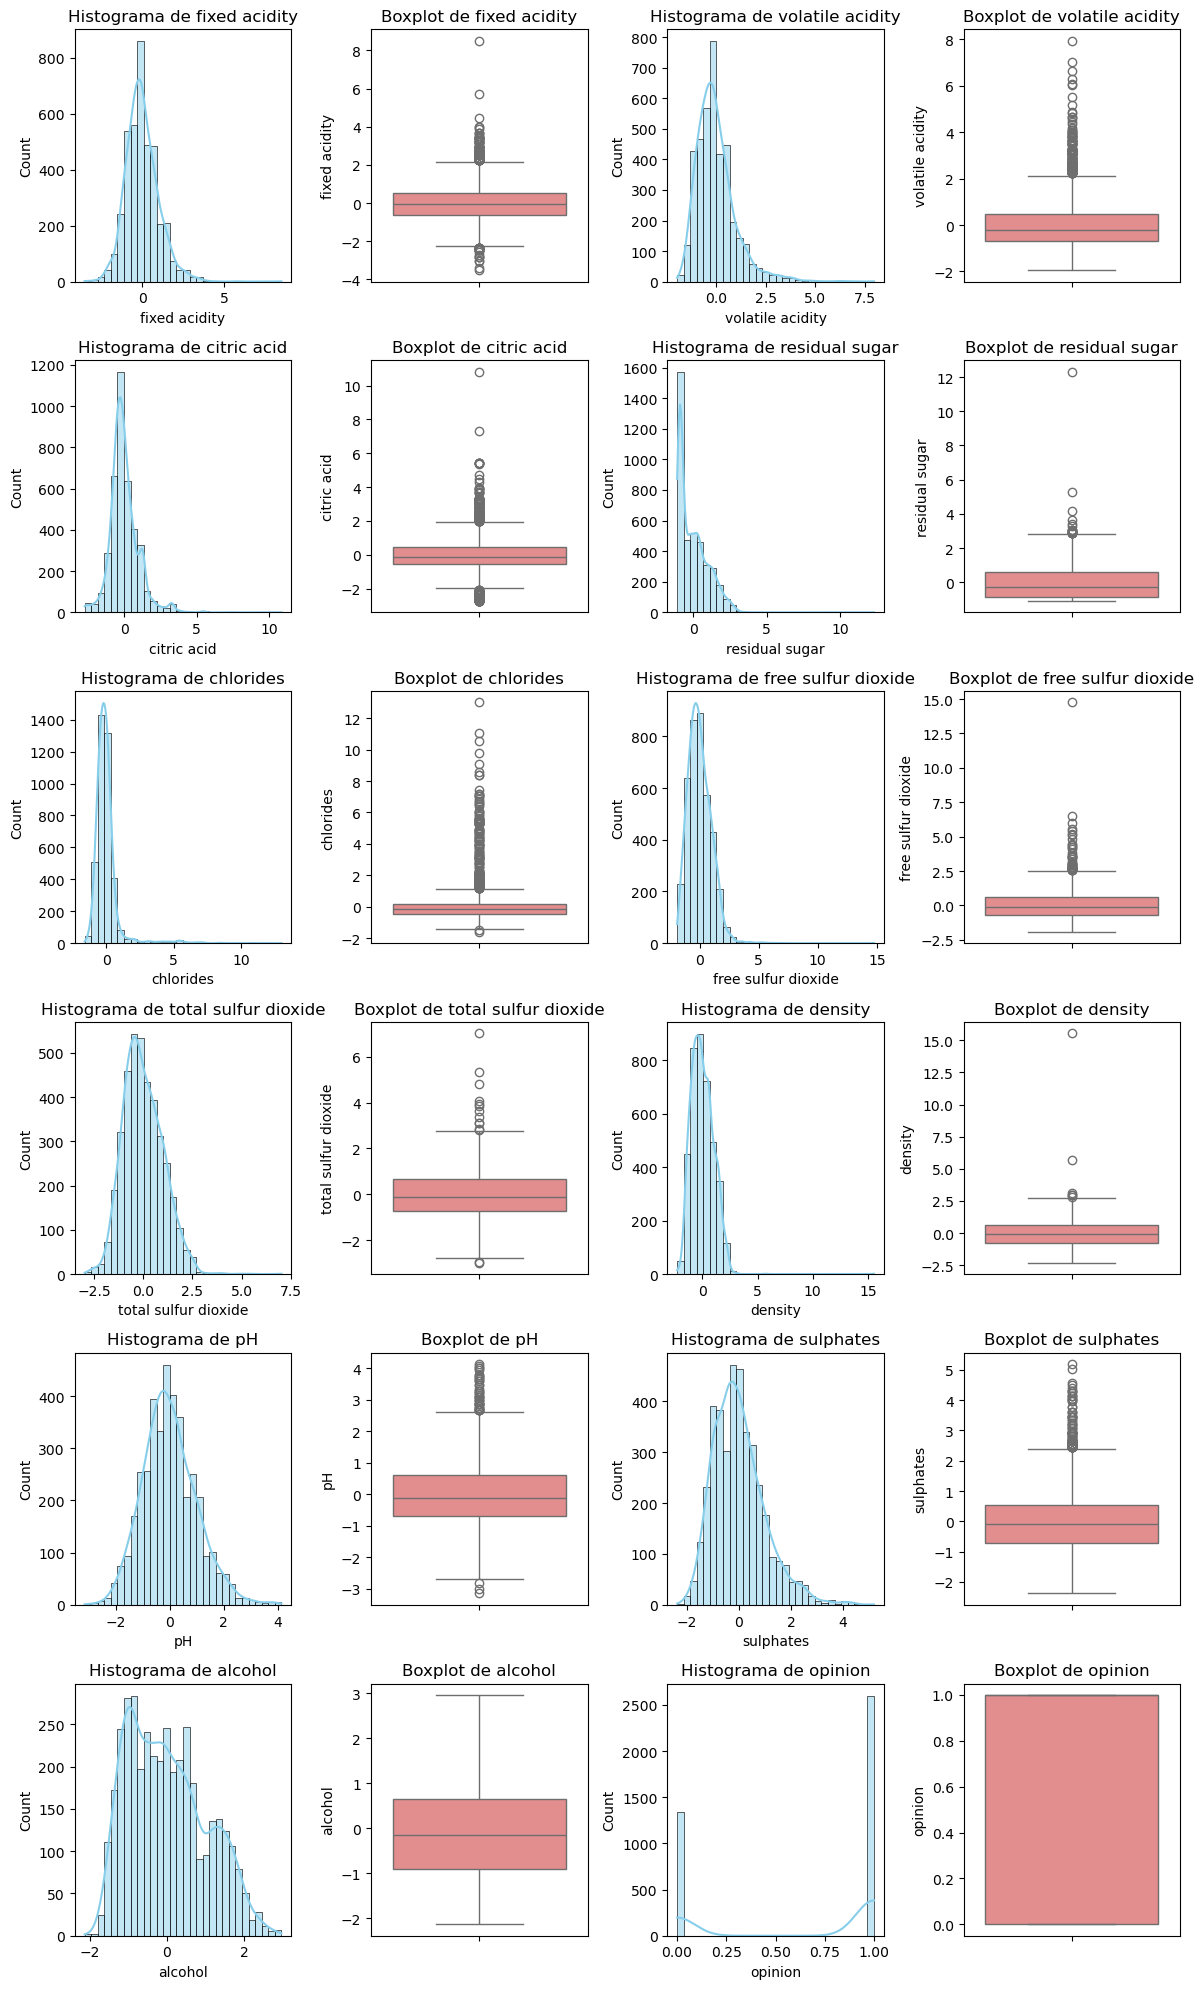

In [73]:
# Padronização dos dados
scaler = StandardScaler()
vinhos_brancos_normalizado = scaler.fit_transform(vinhos_brancos[atb_numericos])
vinhos_brancos_normalizado = pd.DataFrame(vinhos_brancos_normalizado, columns=atb_numericos)

# Definindo o tamanho da figura
fig, axes = plt.subplots(6, 4, figsize=(12, 20))  # 12 linhas, 2 colunas (histograma e boxplot)

# Transformando `axes` em uma lista para facilitar a iteração
axes = axes.flatten()

# Voltando a coluna "opinion" para a sua configuração binária
vinhos_brancos_normalizado['opinion'] = (vinhos_brancos_normalizado['opinion'] > 0).astype(int)

# Criando histogramas e boxplots para cada variável numérica
for index, value in enumerate(atb_numericos):
    # Histograma
    sns.histplot(vinhos_brancos_normalizado[value], bins=30, kde=True, ax=axes[index * 2], color="skyblue")
    axes[index * 2].set_title(f'Histograma de {value}')
    
    # Boxplot (vertical)
    sns.boxplot(y=vinhos_brancos_normalizado[value], ax=axes[index * 2 + 1], color="lightcoral")
    axes[index * 2 + 1].set_title(f'Boxplot de {value}')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

A linha contida dentro do quadrado na "boxplot" é a mediana, e não necessariamente a média, por isto, apesar de próxima, não é igual a zero. Nota-se também que, intencionalmente, "opinion" não foi padronizado para evitar que deixasse de ser um valor binário de 0 ou 1.

# Parte 4

Para que consigamos um bom modelo de classificação, temos as seguintes etapas principais:

1. **Coletar e preparar os dados** 
    - Garantir a qualidade dos dados da sua base, bem como tratá-los de forma adequada, limpando-os e normalizando/padronizando caso necessário.
2. **Dividir em treino e teste**
    - Fazer a divisão dos dados entre treino e teste, para que o modelo seja aplicável no mundo real.
3. **Escolher e treinar o modelo**
    - Testas os diferentes modelos propostos, bem como otimizar os hiperparâmetros.
4. **Avaliar e comparar modelos**
    - Avaliar os modelos tendo em mente a sua figura de mérito de acordo com o contexto do negócio que o seu modelo pretende atender, além do custo computacional associado.
5. **Otimizar e ajustar** 
    - Últimos ajustes com base nos resultados anteriores, mudanças sensíveis nas features ou nos hiperparâmetros
6. **Implementar e monitorar** 
    - Implantar de fato o seu modelo no negócio alvo, e monitorar a performance.

Inicialmente vamos realizar um modelo de regressão logística, que se difere da regressão linear principalmente por não se basear em uma função de reta e sim uma sigmoide. Dessa forma, é adequada para problemas de classificação (por transformar a saída em um binário 0 ou 1).

Para todos os modelos será realizada uma validação cruzada com stratified k-fold. Ele garante, ao dividir em subconjuntos (fold), cada um deles tenha uma proporção entre as classes aproximadamente igual da database original, e sempre utilizando subconjuntos de teste e treinamento diferentes entre as iterações.

In [74]:
# Definindo o X e Y da regressão logística
X_reg_log = vinhos_brancos_normalizado.drop(columns=['opinion'])
y_reg_log = vinhos_brancos_normalizado['opinion']

# Definindo a validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8)

# Definindo os hiperparâmetros para o Grid Search
param_grid = {
   'C': np.arange(0.01, 1.01, 0.01),  
    'penalty': ['l1', 'l2'],         
    'solver': ['liblinear', 'saga']  
}

# Criando o modelo base
modelo = LogisticRegression(max_iter=500, random_state=8)

# Aplicando Grid Search com Validação Cruzada
grid_search = GridSearchCV(
    modelo, 
    param_grid, 
    cv=kfold, 
    scoring='f1', 
    n_jobs=-1
)

grid_search.fit(X_reg_log, y_reg_log)

# Melhor modelo encontrado
melhores_parametros_reg_log = grid_search.best_params_
melhor_modelo_reg_log = grid_search.best_estimator_

print("Melhores parâmetros encontrados:", melhores_parametros_reg_log)
print("Melhor score no Grid Search:", grid_search.best_score_)

# Aplicando a Validação Cruzada com o Melhor Modelo
resultados = cross_validate(
    melhor_modelo_reg_log,
    X_reg_log,  # Features escalonadas
    y_reg_log,  # Target
    cv=kfold,
    scoring={
        'acuracia': 'accuracy',
        'precisao': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    }
)

# Criando um dicionário com a média e o desvio padrão de cada métrica
metricas_resultados_reg_log = {
    m: (np.mean(resultados[f'test_{m}']), np.std(resultados[f'test_{m}'])) 
    for m in ['acuracia', 'precisao', 'recall', 'f1']
}

# Exibindo os resultados
print("\nResultados da Validação Cruzada com o Melhor Modelo:")
for metrica, (media, desvio) in metricas_resultados_reg_log.items():
    print(f"{metrica.capitalize()}: Média = {media:.4f}, Desvio Padrão = {desvio:.4f}")

Melhores parâmetros encontrados: {'C': np.float64(0.12), 'penalty': 'l1', 'solver': 'saga'}
Melhor score no Grid Search: 0.8228510387865763

Resultados da Validação Cruzada com o Melhor Modelo:
Acuracia: Média = 0.7522, Desvio Padrão = 0.0176
Precisao: Média = 0.7791, Desvio Padrão = 0.0168
Recall: Média = 0.8724, Desvio Padrão = 0.0199
F1: Média = 0.8229, Desvio Padrão = 0.0123


Em seguida, o nosso modelo de Árvore de decisão

In [75]:
# Definindo o X e Y da árvore de decisão
X_arv_dec = vinhos_brancos_normalizado.drop(columns=['opinion'])
y_arv_dec = vinhos_brancos_normalizado['opinion']

# Definindo a validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8)

# Definindo os hiperparâmetros para o Grid Search
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],   
    'max_depth':range(1,11,1),            
    'min_samples_split': [2, 5, 10],               
    'min_samples_leaf': [1, 2, 4],                
    'max_features': ['sqrt', 'log2', None]         
}

# Criando o modelo base
modelo = DecisionTreeClassifier(random_state=8)

# Aplicando Grid Search com Validação Cruzada
grid_search = GridSearchCV(
    modelo, 
    param_grid, 
    cv=kfold, 
    scoring='f1', 
    n_jobs=-1
)

grid_search.fit(X_arv_dec, y_arv_dec)

# Melhor modelo encontrado
melhores_parametros_arv_dec = grid_search.best_params_
melhor_modelo_arv_dec = grid_search.best_estimator_

print("Melhores parâmetros encontrados:", melhores_parametros_arv_dec)
print("Melhor score no Grid Search:", grid_search.best_score_)

# Aplicando a Validação Cruzada com o Melhor Modelo
resultados = cross_validate(
    melhor_modelo_arv_dec,
    X_arv_dec, 
    y_arv_dec, 
    cv=kfold,
    scoring={
        'acuracia': 'accuracy',
        'precisao': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    }
)

# Criando um dicionário com a média e o desvio padrão de cada métrica
metricas_resultados_arv_dec = {
    m: (np.mean(resultados[f'test_{m}']), np.std(resultados[f'test_{m}'])) 
    for m in ['acuracia', 'precisao', 'recall', 'f1']
}

# Exibindo os resultados
print("\nResultados da Validação Cruzada com o Melhor Modelo:")
for metrica, (media, desvio) in metricas_resultados_arv_dec.items():
    print(f"{metrica.capitalize()}: Média = {media:.4f}, Desvio Padrão = {desvio:.4f}")

Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor score no Grid Search: 0.8134533019270762

Resultados da Validação Cruzada com o Melhor Modelo:
Acuracia: Média = 0.7349, Desvio Padrão = 0.0200
Precisao: Média = 0.7604, Desvio Padrão = 0.0235
Recall: Média = 0.8754, Desvio Padrão = 0.0216
F1: Média = 0.8135, Desvio Padrão = 0.0123


E por fim, o SVM

In [76]:
# Definindo o X e Y da svm
X_svm = vinhos_brancos_normalizado.drop(columns=['opinion'])
y_svm = vinhos_brancos_normalizado['opinion']

# Definindo a validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8)

# Definindo os hiperparâmetros para o Grid Search
param_grid = {
    'C': np.arange(0.05,2,0.05),           
    'kernel': ['linear'],                  
    'gamma': ['scale', 'auto'],            
}

# Criando o modelo base
modelo = SVC(random_state=8)

# Aplicando Grid Search com Validação Cruzada
grid_search = GridSearchCV(
    modelo, 
    param_grid, 
    cv=kfold, 
    scoring='f1',  
    n_jobs=-1
)

grid_search.fit(X_svm, y_svm)

# Melhor modelo encontrado
melhores_parametros_svm = grid_search.best_params_
melhor_modelo_svm = grid_search.best_estimator_

print("Melhores parâmetros encontrados:", melhores_parametros_svm)
print("Melhor score no Grid Search:", grid_search.best_score_)

# Aplicando a Validação Cruzada com o Melhor Modelo
resultados = cross_validate(
    melhor_modelo_svm,
    X_svm,  
    y_svm, 
    cv=kfold,
    scoring={
        'acuracia': 'accuracy',
        'precisao': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    }
)

# Criando um dicionário com a média e o desvio padrão de cada métrica
metricas_resultados_svm = {
    m: (np.mean(resultados[f'test_{m}']), np.std(resultados[f'test_{m}'])) 
    for m in ['acuracia', 'precisao', 'recall', 'f1']
}

# Exibindo os resultados
print("\nResultados da Validação Cruzada com o Melhor Modelo:")
for metrica, (media, desvio) in metricas_resultados_svm.items():
    print(f"{metrica.capitalize()}: Média = {media:.4f}, Desvio Padrão = {desvio:.4f}")


Melhores parâmetros encontrados: {'C': np.float64(0.05), 'gamma': 'scale', 'kernel': 'linear'}
Melhor score no Grid Search: 0.8242198000545671

Resultados da Validação Cruzada com o Melhor Modelo:
Acuracia: Média = 0.7527, Desvio Padrão = 0.0190
Precisao: Média = 0.7764, Desvio Padrão = 0.0182
Recall: Média = 0.8789, Desvio Padrão = 0.0225
F1: Média = 0.8242, Desvio Padrão = 0.0135


# Parte 5

Tendo os três modelos em mãos, vamos começar a comparação entre eles visando o melhor resultado possível.

Contudo, é importante entender o que é o melhor resultado possível. Como sabemos que o número de vinhos bons é bastante superior ao número de vinhos ruins, esse desbalanceamento entre as classes faz com que a acurácia não seja tão recomendada.

Em seguida, é interessante pensar no que o nosso modelo seria utilizado. Possivelmente em um serviço de entregas mensais de vinhos, então devemos pensar se queremos maximizar a precisão, garantido que o menor número possível de vinhos abaixo do desejado vá para nossos clientes. Ou de forma mais ousada maximizar o recall, garantindo que o menor número possível de vinhos ótimos deixem de ir para nossos clientes. Talvez ambos modelos façam sentidos em assinaturas diferentes, a primeira mais "Clássica" garantindo vinhos de alta qualidade, enquanto a segunda mais "Aventureira" buscando não deixar passsar nenhum vinho excelente.

Por fim, sem que tenhamos ainda essa diferenciação entre as "assinaturas" de vinho, pretendo utilizar como balizador o f1-score, sendo ele a média harmônica entre recall e precisão e sabendo lidar bem com um desbalanceamento entre as classes.

In [77]:
# Criando um DataFrame com os resultados salvos de cada modelo
comparacao_modelos = pd.DataFrame({
    "Modelo": ["Regressão Logística", "Árvore de Decisão", "SVM"],
    "Acurácia": [metricas_resultados_reg_log["acuracia"][0], 
                 metricas_resultados_arv_dec["acuracia"][0], 
                 metricas_resultados_svm["acuracia"][0]],
    "Precisão": [metricas_resultados_reg_log["precisao"][0], 
                 metricas_resultados_arv_dec["precisao"][0], 
                 metricas_resultados_svm["precisao"][0]],
    "Recall": [metricas_resultados_reg_log["recall"][0], 
               metricas_resultados_arv_dec["recall"][0], 
               metricas_resultados_svm["recall"][0]],
    "F1-score": [metricas_resultados_reg_log["f1"][0], 
                 metricas_resultados_arv_dec["f1"][0], 
                 metricas_resultados_svm["f1"][0]]
})

# Exibindo a tabela
print(comparacao_modelos)


                Modelo  Acurácia  Precisão    Recall  F1-score
0  Regressão Logística  0.752169  0.779056  0.872353  0.822851
1    Árvore de Decisão  0.734918  0.760446  0.875435  0.813453
2                  SVM  0.752672  0.776435  0.878884  0.824220


Desta forma, vemos que todos os modelos tem resultados semelhantes e satisfatórios, com f1-scores acima de 0.8. No detalhe, a princípio o SVM será o modelo escolhido, contudo há méritos em escolher a regressão logística devido a sua maior simplicidade computacional. Vamos observar a curva ROC para ver se muda a nossa decisão.

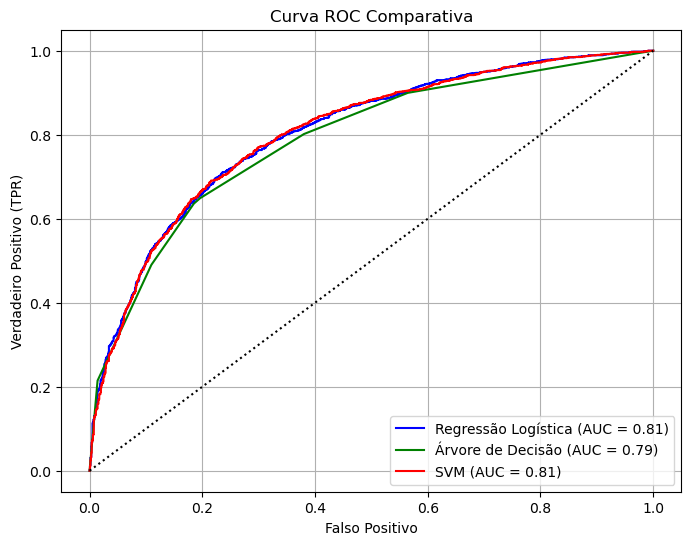

In [78]:
# Obtendo probabilidades preditas para cada modelo
y_proba_reg_log = melhor_modelo_reg_log.predict_proba(X_reg_log)[:, 1]
y_proba_arv_dec = melhor_modelo_arv_dec.predict_proba(X_arv_dec)[:, 1]
y_proba_svm = melhor_modelo_svm.decision_function(X_svm)  

# Calculando a Curva ROC
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_reg_log, y_proba_reg_log)
fpr_arv_dec, tpr_arv_dec, _ = roc_curve(y_arv_dec, y_proba_arv_dec)
fpr_svm, tpr_svm, _ = roc_curve(y_svm, y_proba_svm)

# Calculando a AUC
auc_reg_log = auc(fpr_reg_log, tpr_reg_log)
auc_arv_dec = auc(fpr_arv_dec, tpr_arv_dec)
auc_svm = auc(fpr_svm, tpr_svm)

# Plotando as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_reg_log, tpr_reg_log, label=f'Regressão Logística (AUC = {auc_reg_log:.2f})', color='blue')
plt.plot(fpr_arv_dec, tpr_arv_dec, label=f'Árvore de Decisão (AUC = {auc_arv_dec:.2f})', color='green')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='red')

# Linha diagonal (classificação aleatória)
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted')

# Configurações do gráfico
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo (TPR)')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.grid()
plt.show()


Vendo novamente a semelhança entre os modelos, para o propósito deste exercício seguiremos com a SVM mas tendo em mente que caso trabalho computacional for um gargalo no sistema poderemos utilizar com certa confiança a regressão logística.

# Parte 6

Para fazer a aplicação do melhor modelo na base com vinhos tintos, vamos tratá-los da mesma forma, eliminando as linhas duplicadas e as que possuem valores nulos, em seguida aplicando o StandardScaler e retornando a binariedade da coluna "opinion"

In [79]:
# Removendo as linhas duplicadas 
vinhos_tintos = vinhos_tintos.drop_duplicates()

# Removendo todas as linhas que possuem valores nulos
vinhos_tintos = vinhos_tintos.dropna()

# Padronização dos dados
scaler = StandardScaler()
vinhos_tintos_normalizado = scaler.fit_transform(vinhos_tintos[atb_numericos])
vinhos_tintos_normalizado = pd.DataFrame(vinhos_tintos_normalizado, columns=atb_numericos)

# Voltando a coluna "opinion" para a sua configuração binária
vinhos_tintos_normalizado['opinion'] = (vinhos_tintos_normalizado['opinion'] > 0).astype(int)




Resultados da Validação Cruzada com o Melhor Modelo SVM para Vinhos Tintos:
Acuracia: Média = 0.7347, Desvio Padrão = 0.0358
Precisao: Média = 0.7718, Desvio Padrão = 0.0357
Recall: Média = 0.7075, Desvio Padrão = 0.0578
F1: Média = 0.7372, Desvio Padrão = 0.0397


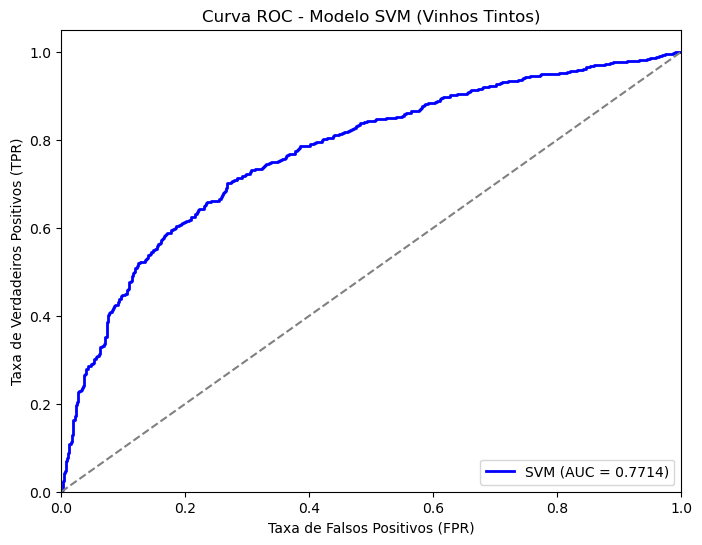

In [80]:
# Definindo o X e Y para a base "vinhos_tintos"
X_tintos_svm = vinhos_tintos_normalizado.drop(columns=['opinion'])
y_tintos_svm = vinhos_tintos_normalizado['opinion']

# Definindo a validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8)

# Aplicando o modelo SVM treinado anteriormente na nova base de dados
resultados_tintos = cross_validate(
    melhor_modelo_svm,  # Utilizando o melhor modelo encontrado no Grid Search anterior
    X_tintos_svm,  
    y_tintos_svm, 
    cv=kfold,
    scoring={
        'acuracia': 'accuracy',
        'precisao': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    }
)

# Criando um dicionário com a média e o desvio padrão de cada métrica
metricas_resultados_tintos_svm = {
    m: (np.mean(resultados_tintos[f'test_{m}']), np.std(resultados_tintos[f'test_{m}'])) 
    for m in ['acuracia', 'precisao', 'recall', 'f1']
}

# Exibindo os resultados para os vinhos tintos
print("\nResultados da Validação Cruzada com o Melhor Modelo SVM para Vinhos Tintos:")
for metrica, (media, desvio) in metricas_resultados_tintos_svm.items():
    print(f"{metrica.capitalize()}: Média = {media:.4f}, Desvio Padrão = {desvio:.4f}")

    from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtendo as probabilidades preditas pelo modelo SVM
y_scores_svm = melhor_modelo_svm.decision_function(X_tintos_svm)

# Calculando a Curva ROC
fpr, tpr, _ = roc_curve(y_tintos_svm, y_scores_svm)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'SVM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Modelo SVM (Vinhos Tintos)')
plt.legend(loc='lower right')
plt.show()

Vemos que o mesmo modelo performa significativamente pior com database apenas de vinhos tintos. Ainda é razoável, visto que possui um valor de AUC significativamente acima de 0.5 (que configuraria um modelo "aleatório"), mas não é tão efetivo.

Este comportamento é completamente esperado visto que o modelo é treinado apenas com vinhos brancos, que possuem caracteristicas químico-físicas diferentes dos vinhos tintos. Para evidenciar isso vamos comparar as médias dos atributos a seguir 

In [81]:
# Calculando a média e o desvio padrão de cada variável numérica
medias_tintos = vinhos_tintos[atb_numericos].mean()
desvios_padroes_tintos = vinhos_tintos[atb_numericos].std()

# Exibindo os resultados formatados
estatisticas_ambos = pd.DataFrame({'Média Tintos': medias_tintos, 'Média Branco': medias,'Desvio Padrão Tintos': desvios_padroes_tintos, 'Desvio Padrão Branco': desvios_padroes})
print(estatisticas_ambos)

                      Média Tintos  Média Branco  Desvio Padrão Tintos  \
fixed acidity             8.318477      6.840297              1.736520   
volatile acidity          0.529294      0.280430              0.183323   
citric acid               0.273016      0.334490              0.195585   
residual sugar            2.522986      5.918721              1.354667   
chlorides                 0.088163      0.045887              0.049463   
free sulfur dioxide      15.854398     34.918062             10.418830   
total sulfur dioxide     46.822986    137.215753             33.432546   
density                   0.996715      0.993788              0.001870   
pH                        3.309165      3.195287              0.154938   
sulphates                 0.658374      0.490236              0.170917   
alcohol                  10.428394     10.591945              1.081636   
opinion                   0.528455      0.659817              0.499374   

                      Desvio Padrão B

Vemos que variaveis que tratam da acidez, açucares, cloretos e dióxidos de enxofre, dentre outras são significativamente diferente. Portanto, é completamente esperado que um modelo com o víes dos vinhos brancos não performasse adequadamente tentando classificar os vinhos tintos.



# Parte 7

Este trabalho pode ser encontrado em: https://github.com/AlansAlonso/PG-IA/tree/main/Classificacao